In [ ]:
import nltk
from nltk import bigrams
import pandas as pd
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.probability import ConditionalFreqDist
from nltk import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import re

In [ ]:
df = pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
df.drop_duplicates(subset=['text'], keep='first', inplace=True)
df.dropna(subset=['text'], inplace=True)

def clean_text(text):
    text = re.sub(r'[^A-Za-z ]+', ' ', text)
    text = ' '.join(text.split())
    return text

df['cleaned_text'] = df['text'].apply(clean_text)
data = df['cleaned_text']
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

df['Tokenized_Text'] = df['cleaned_text'].apply(tokenize_text)
df.head()

,text,spam,Tokenized_Text,cleaned_text
0,Subject: naturally irresistible your corporate...,1,"[Subject, naturally, irresistible, your, corpo...",Subject naturally irresistible your corporate ...
1,Subject: the stock trading gunslinger fanny i...,1,"[Subject, the, stock, trading, gunslinger, fan...",Subject the stock trading gunslinger fanny is ...
2,Subject: unbelievable new homes made easy im ...,1,"[Subject, unbelievable, new, homes, made, easy...",Subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,1,"[Subject, color, printing, special, request, a...",Subject color printing special request additio...
4,"Subject: do not have money , get software cds ...",1,"[Subject, do, not, have, money, get, software,...",Subject do not have money get software cds fro...


In [ ]:
# Task - 02

bi_grams = [bigram for bigram_list in df['Tokenized_Text'] for bigram in bigrams(bigram_list)]
bigram_freq = FreqDist(bi_grams)
top_10_bigrams = bigram_freq.most_common(10)
print("\nBigrams:")
print(bi_grams)

print("\nBigram Frequency:")
for bigram, freq in bigram_freq.items():
    print(bigram, freq)

print("\nTop 10 Most Common Bigrams:")
for bigram, freq in top_10_bigrams:
    print(bigram, freq)


Bigrams:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
('economy', 'it') 1
('revolution', 'will') 1
('s', 'landscape') 1
('landscape', 'during') 1
('provide', 'answers') 1
('posed', 'above') 1
('above', 'based') 1
('the', 'currently') 2
('available', 'information') 1
('with', 'fallback') 1
('fallback', 'strategies') 1
('implement', 'in') 1
('currently', 'expected') 1
('expected', 'trends') 1
('trends', 'fail') 1
('to', 'materialize') 1
('jesus', 'friday') 1
('free', 'between') 1
('aram', 'would') 1
('re', 'dragon') 1
('dragon', 'curves') 1
('curves', 'thai') 1
('thai', 'baht') 2
('baht', 'forecast') 3
('forecast', 'we') 2
('the', 'thai') 1
('produced', 'on') 1
('previous', 'curve') 1
('was', 'dated') 1
('dated', 'may') 1
('first', 'report') 1
('report', 'provides') 1
('provides', 'specific') 1
('specific', 'economic') 1
('economic', 'factors') 1
('that', 'formed') 1
('formed', 'the') 1
('our', 'baht') 1
('forecast', 'decisions') 1
('of', 'ppp') 1
('ppp', 'theory') 1
('exchange', 'forecasti

In [ ]:
# Task - 03

word_list = [word for sublist in df['Tokenized_Text'] for word in sublist]
bi_grams = list(bigrams(word_list))
bigram_freq = FreqDist(bi_grams)
top_10_bigrams = bigram_freq.most_common(10)
print("Flattened list of words:")
print(word_list)

print("\nBigrams:")
print(bi_grams)

print("\nBigram Frequency:")
for bigram, freq in bigram_freq.items():
    print(bigram, freq)

print("\nTop 10 Most Common Bigrams:")
for bigram, freq in top_10_bigrams:
    print(bigram, freq)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
('aram', 'would') 1
('re', 'dragon') 1
('dragon', 'curves') 1
('curves', 'thai') 1
('thai', 'baht') 2
('baht', 'forecast') 3
('forecast', 'we') 2
('the', 'thai') 1
('produced', 'on') 1
('previous', 'curve') 1
('was', 'dated') 1
('dated', 'may') 1
('first', 'report') 1
('report', 'provides') 1
('provides', 'specific') 1
('specific', 'economic') 1
('economic', 'factors') 1
('that', 'formed') 1
('formed', 'the') 1
('our', 'baht') 1
('forecast', 'decisions') 1
('of', 'ppp') 1
('ppp', 'theory') 1
('exchange', 'forecasting') 1
('forecasting', 'with') 1
('detailed', 'discussion') 1
('propriety', 'to') 1
('economic', 'outlook') 1
('rate', 'forecast') 1
('for', 'thailand') 1
('thailand', 'regards') 1
('zhang', 'attached') 1
('fujita', 'i') 1
('dinner', 'arrangements') 1
('the', 'latour') 1
('restaurant', 'located') 1
('jester', 'for') 1
('do', 'require') 1
('coat', 'i') 1
('the', 'cabs') 1
('cabs', 'will') 1
('case', 'take') 1
('east', 'go') 1


In [ ]:
# Task - 04
def analyze_ngrams(text, n):
    n_grams = [ngram for ngram_list in df['Tokenized_Text'] for ngram in ngrams(ngram_list, n)]
    ngram_freq = FreqDist(n_grams)
    top_10_ngrams = ngram_freq.most_common(10)
    return ngram_freq, top_10_ngrams
n = 3
ngram_freq, top_10_ngrams = analyze_ngrams(df['Tokenized_Text'], n)
print(f"{n}-grams:")
print(list(ngrams(df['Tokenized_Text'][0], n)))
print(f"\nTop 10 Most Common {n}-grams:")
for ngram, freq in top_10_ngrams:
    print(ngram, freq)

3-grams:
[('Subject', 'naturally', 'irresistible'), ('naturally', 'irresistible', 'your'), ('irresistible', 'your', 'corporate'), ('your', 'corporate', 'identity'), ('corporate', 'identity', 'lt'), ('identity', 'lt', 'is'), ('lt', 'is', 'really'), ('is', 'really', 'hard'), ('really', 'hard', 'to'), ('hard', 'to', 'recollect'), ('to', 'recollect', 'a'), ('recollect', 'a', 'company'), ('a', 'company', 'the'), ('company', 'the', 'market'), ('the', 'market', 'is'), ('market', 'is', 'full'), ('is', 'full', 'of'), ('full', 'of', 'suqgestions'), ('of', 'suqgestions', 'and'), ('suqgestions', 'and', 'the'), ('and', 'the', 'information'), ('the', 'information', 'isoverwhelminq'), ('information', 'isoverwhelminq', 'but'), ('isoverwhelminq', 'but', 'a'), ('but', 'a', 'good'), ('a', 'good', 'catchy'), ('good', 'catchy', 'logo'), ('catchy', 'logo', 'stylish'), ('logo', 'stylish', 'statlonery'), ('stylish', 'statlonery', 'and'), ('statlonery', 'and', 'outstanding'), ('and', 'outstanding', 'website'),

In [ ]:
# Task - 05
bi_grams = [bigram for bigram_list in df['Tokenized_Text'] for bigram in bigrams(bigram_list)]
cfd = ConditionalFreqDist(bi_grams)
word_to_explore = 'common'
if word_to_explore in cfd:
    following_words = cfd[word_to_explore]
    print(f"Words following '{word_to_explore}':")
    following_words.tabulate(10)

word_to_explore = 'word'
if word_to_explore in cfd:
    preceding_words = cfd[word_to_explore]
    print(f"Words preceding '{word_to_explore}':")
    preceding_words.tabulate(10)

Words following 'common':
  research     shares   language      sense     sansom        and      stock          s derivative   approach 
        29         10          7          6          6          5          4          3          3          3 
Words preceding 'word':
   remove  document        on       and documents       out     about      that       for        to 
       15        11         9         6         5         5         5         4         4         4 


In [ ]:
# Task - 06

df['bigram'] = df['Tokenized_Text'].apply(lambda x: list(ngrams(x, 2)))
df['trigram'] = df['Tokenized_Text'].apply(lambda x: list(ngrams(x, 3)))

bigram_freq = pd.Series([item for sublist in df['bigram'] for item in sublist]).value_counts()
total_bigrams = len([item for sublist in df['bigram'] for item in sublist])
bigram_prob = bigram_freq / total_bigrams
print(bigram_prob.head(10))
print()
trigram_freq = pd.Series([item for sublist in df['trigram'] for item in sublist]).value_counts()
total_trigram_bigrams = len([item for sublist in df['trigram'] for item in sublist])
trigram_prob = trigram_freq / total_trigram_bigrams
print(trigram_prob.head(10))

(of, the)        0.004047
(hou, ect)       0.004041
(ect, ect)       0.003769
(in, the)        0.003273
(j, kaminski)    0.002558
(vince, j)       0.002534
(if, you)        0.002073
(will, be)       0.002021
(for, the)       0.002016
(to, the)        0.001951
dtype: float64

(hou, ect, ect)         0.003197
(vince, j, kaminski)    0.002541
(kaminski, hou, ect)    0.001380
(j, kaminski, hou)      0.001380
(ect, ect, cc)          0.001184
(let, me, know)         0.001005
(to, vince, j)          0.000795
(would, like, to)       0.000792
(hou, ect, on)          0.000740
(please, let, me)       0.000673
dtype: float64


<Axes: >

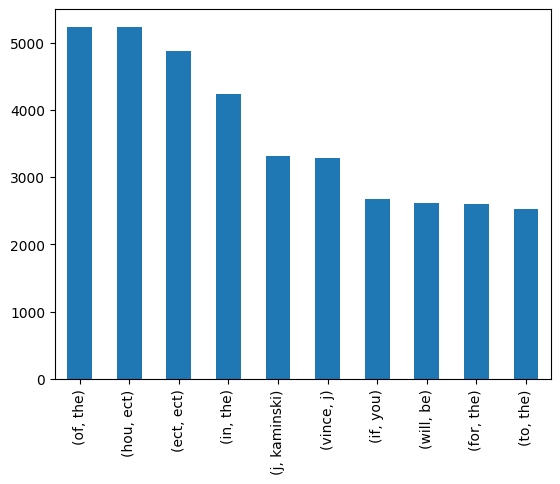

In [ ]:
bigram_freq.head(10).plot(kind='bar')

<Axes: >

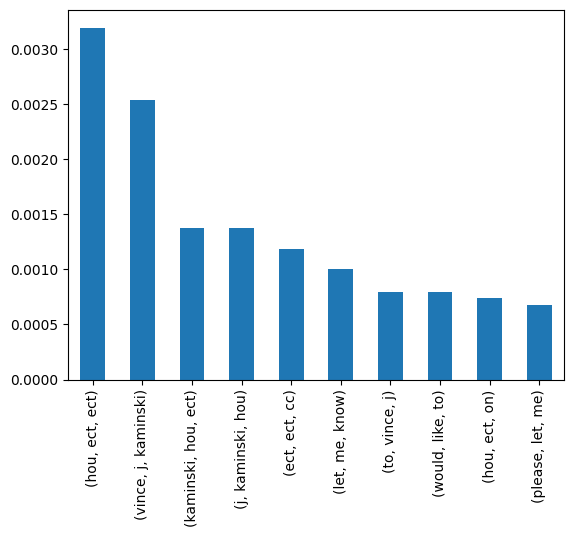

In [ ]:
trigram_prob.head(10).plot(kind='bar')